In [20]:
import numpy as np
import torch
print(torch.__version__)

D:\Artificial\.venv\Lib\site-packages\gymnasium\envs\registration.py:517: DeprecationWarning: WARN: The environment MsPacmanDeterministic-v0 is out of date. You should consider upgrading to version `v4`.
  logger.deprecation(


State shape:  (210, 160, 3)
State size:  210
Number of actions:  9
Using device: cuda
Episode 1	Average Score: 260.00

KeyboardInterrupt: 

In [ ]:
weight = 0.7
bias = 0.3

start = 0
end = 1
step = 0.02
X = torch.arange(start, end, step).unsqueeze(dim=1)
Y = weight * X + bias

print(len(X), len(Y))
X[:10], Y[:10]

In [ ]:
##Splitting into training and testing
train_split = int(0.8 * len(X))
X_train, Y_train = X[:train_split], Y[:train_split]
X_test, Y_test = X[train_split:], Y[train_split:]

len(X_train), len(X_test), len(Y_train), len(Y_test)

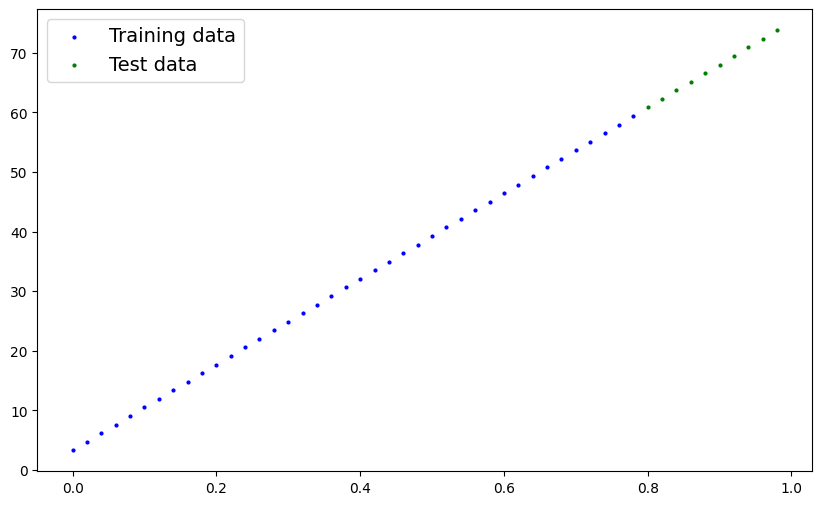

In [8]:
import matplotlib.pyplot as plt


def plot_prediction(
        train_data=X_train,
        train_label=Y_train,
        test_data=X_test,
        test_label=Y_test,
        predictions=None):
    plt.figure(figsize=(10, 6))
    #Plot training data in blue
    plt.scatter(train_data, train_label, c="b", s=4, label="Training data")

    #Plot testing data in green
    plt.scatter(test_data, test_label, c="g", s=4, label="Test data")

    if predictions is not None:
        plt.scatter(test_data, predictions, c="r", s=4, label="Predictions")

    plt.legend(prop={"size": 14})
    plt.show()


plot_prediction();

BUILD MODEL

In [ ]:
from torch import nn

#Create linear regression model class
class LinearRegressionModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.weight = nn.Parameter(torch.randn(1, requires_grad=True, dtype=torch.float))
        self.bias = nn.Parameter(torch.randn(1, requires_grad=True, dtype=torch.float))

    def forward(self, x: torch.Tensor) -> torch.Tensor:
        return self.weight * x + self.bias

In [ ]:
#random seed
torch.manual_seed(42)

#create an instance of the model
model_0 = LinearRegressionModel()
print(list(model_0.parameters()))
model_0.state_dict()

In [ ]:
with torch.inference_mode():
    Y_preds = model_0(X_test)

print(Y_preds)
plot_prediction(predictions=Y_preds)

In [ ]:
loss_fn = nn.L1Loss()

optimizer = torch.optim.SGD(params=model_0.parameters(), lr=0.01)

In [ ]:
epochs = 200
epochs_counter = []
loss_values = []
test_loss_values = []

for epoch in range(epochs):
    model_0.train()

    Y_preds = model_0(X_train)  # 1 forward pass
    loss = loss_fn(Y_preds, Y_train)  # 2 calculate the loss
    optimizer.zero_grad()  # 3 optimizer zero grad
    loss.backward()  # perform backpropagation on the loss wrt parameter of the model
    optimizer.step()  # step the optimizer
    model_0.eval()

    with torch.inference_mode():

        test_preds = model_0(X_test)
        test_loss = loss_fn(test_preds, Y_test)

    if epoch % 10 == 0:
        epochs_counter.append(epoch)
        loss_values.append(loss)
        test_loss_values.append(test_loss)
        print(f"Epoch: {epoch} | Loss: {loss} | Test Loss: {test_loss}")

In [ ]:
    import numpy as np

plt.plot(epochs_counter, np.array(torch.tensor(loss_values).numpy()), label="Training Loss")
plt.plot(epochs_counter, test_loss_values, label="Testing Loss")
plt.title("Training and Test Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

In [ ]:
# Make predictions with model
with torch.inference_mode():
    y_preds = model_0(X_test)
plot_prediction(predictions=y_preds)

In [ ]:
model_0.state_dict()


ENDING

In [5]:
import torch
#Create
weight = 71.9
bias = 3.3

#Create range value
start = 0
end = 1
step = 0.02

#Create x and y
x = torch.arange(start, end, step).unsqueeze(dim=1)
y = weight * x + bias
x[:10], y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[ 3.3000],
         [ 4.7380],
         [ 6.1760],
         [ 7.6140],
         [ 9.0520],
         [10.4900],
         [11.9280],
         [13.3660],
         [14.8040],
         [16.2420]]))

In [7]:
#Split data
train_split = int(0.8 * len(x))
X_train, Y_train = x[:train_split], y[:train_split]
X_test, Y_test = x[train_split:], y[train_split:]
len(X_train), len(X_test), len(Y_train), len(Y_test)

(40, 10, 40, 10)

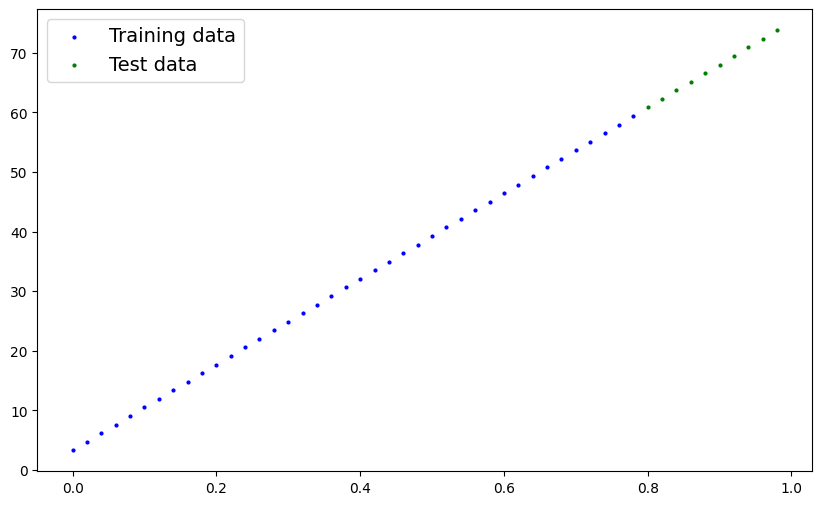

In [9]:
#Plot data
plot_prediction(X_train, Y_train, X_test, Y_test)

In [12]:
#pytorch linear model
from torch import nn

class LinearRegressionModel2(nn.Module):
    def __init__(self):
        super().__init__()

        #Use nn.Linear()
        self.linear_layer = nn.Linear(in_features=1, out_features=1)

    def forword(self, x: torch.Tensor) -> torch.Tensor:
        return self.linear_layer(x)

torch.manual_seed(42)
model_2 = LinearRegressionModel2()
model_2,model_2.state_dict()

(LinearRegressionModel2(
   (linear_layer): Linear(in_features=1, out_features=1, bias=True)
 ),
 OrderedDict([('linear_layer.weight', tensor([[0.7645]])),
              ('linear_layer.bias', tensor([0.8300]))]))

In [26]:
next(model_2.parameters()).device

device(type='cuda', index=0)

In [25]:
model_2.to(device=torch.device('cuda'))
next(model_2.parameters()).device

device(type='cuda', index=0)

In [ ]:
#Trainig
